In [1]:
import os
import shutil


SOURCE_DIR = '/kaggle/input/bccd-coco'
DEST_DIR = '/kaggle/working/bccd-coco'


if not os.path.exists(DEST_DIR):
    shutil.copytree(SOURCE_DIR, DEST_DIR)
    print("Dataset copied to working directory!")
else:
    print("Dataset already exists in working directory!")


Dataset copied to working directory!


In [2]:

def organize_data(path):
    images_path = os.path.join(path, 'images')
    os.makedirs(images_path, exist_ok=True)
    
    for file in os.listdir(path):
        if file.endswith(('.jpg', '.png')) and not os.path.isdir(os.path.join(path, file)):
            shutil.move(os.path.join(path, file), os.path.join(images_path, file))


organize_data(f'{DEST_DIR}/train')
organize_data(f'{DEST_DIR}/valid')
organize_data(f'{DEST_DIR}/test')

print("Data organized successfully!")


Data organized successfully!


In [3]:
data_yaml = f"""
train: {DEST_DIR}/train/images
val: {DEST_DIR}/valid/images
test: {DEST_DIR}/test/images

nc: 3
names: ['RBC', 'WBC', 'Platelets']
"""


with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(data_yaml)

print("data.yaml created successfully!")


data.yaml created successfully!


In [4]:

!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17274, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17274 (delta 1), reused 0 (delta 0), pack-reused 17271 (from 3)
Receiving objects: 100% (17274/17274), 16.12 MiB | 30.28 MiB/s, done.
Resolving deltas: 100% (11856/11856), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 16.1 MB/s eta 0:00:00a 0:00:01


In [6]:
import os
import json
import shutil


DATASET_PATH = "/kaggle/working/bccd-coco"
DEST_PATH = "/kaggle/working/bccd-yolo"

for split in ['train', 'valid', 'test']:
    os.makedirs(f"{DEST_PATH}/{split}/images", exist_ok=True)
    os.makedirs(f"{DEST_PATH}/{split}/labels", exist_ok=True)


def convert_coco_to_yolo(split):
    json_path = f"{DATASET_PATH}/{split}/_annotations.coco.json"
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    for img in data['images']:
        file_name = img['file_name']
        width, height = img['width'], img['height']
        img_id = img['id']

        
        src_img = f"{DATASET_PATH}/{split}/images/{file_name}"
        dest_img = f"{DEST_PATH}/{split}/images/{file_name}"
        
        
        if os.path.exists(src_img):
            shutil.copy(src_img, dest_img)
        else:
            print(f" File not found: {src_img}")
            continue

        
        label_file = f"{DEST_PATH}/{split}/labels/{file_name.replace('.jpg', '.txt')}"
        with open(label_file, 'w') as f:
            for ann in data['annotations']:
                if ann['image_id'] == img_id:
                    x_center = (ann['bbox'][0] + ann['bbox'][2] / 2) / width
                    y_center = (ann['bbox'][1] + ann['bbox'][3] / 2) / height
                    bbox_width = ann['bbox'][2] / width
                    bbox_height = ann['bbox'][3] / height
                    category_id = ann['category_id'] - 1  # Make category_id start from 0
                    f.write(f"{category_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")


for split in ['train', 'valid', 'test']:
    convert_coco_to_yolo(split)

print("Conversion to YOLO format complete!")


Conversion to YOLO format complete!


In [9]:
data_yaml = f"""
train: /kaggle/working/bccd-yolo/train/images
val: /kaggle/working/bccd-yolo/valid/images
test: /kaggle/working/bccd-yolo/test/images

nc: 3
names: ['RBC', 'WBC', 'Platelets']
"""

# Write to data.yaml
with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(data_yaml)

print("data.yaml created successfully!")


data.yaml created successfully!


In [12]:
!ls /kaggle/working/yolov5


benchmarks.py	 data	     LICENSE	     README.zh-CN.md   tutorial.ipynb
CITATION.cff	 detect.py   models	     requirements.txt  utils
classify	 export.py   pyproject.toml  segment	       val.py
CONTRIBUTING.md  hubconf.py  README.md	     train.py


In [14]:
!python /kaggle/working/yolov5/train.py --imgsz 640 --batch-size 16 --epochs 300 --data /kaggle/working/data.yaml --weights yolov5m.pt --hyp data/hyps/hyp.scratch-med.yaml --device 0 --project '' --name '' --entity ''


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-18 11:47:38.114583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-18 11:47:38.135907: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-18 11:47:38.142437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [34]:
!python train.py --img 640 --batch 16 --epochs 50 \
--data /kaggle/working/data.yaml --weights /kaggle/working/best_model/best.pt \
--device 0


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-18 12:54:31.262789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-18 12:54:31.285753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-18 12:54:31.292385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [38]:
hyp_yaml_path = "/kaggle/working/yolov5/data/hyps/hyp.scratch-low.yaml"

# Define updated hyperparameters
hyp_yaml_content = f"""
# Hyperparameters for YOLOv5 fine-tuning on BCCD dataset
lr0: 0.0005  # Lower initial learning rate for fine-tuning
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

# Augmentation settings
mosaic: 1.0
mixup: 0.5
degrees: 20
translate: 0.1
scale: 0.5
flipud: 0.5
fliplr: 0.5
"""


with open(hyp_yaml_path, "w") as f:
    f.write(hyp_yaml_content)

print(" hyp.scratch-low.yaml updated successfully!")


✅ hyp.scratch-low.yaml updated successfully!


In [42]:
hyp_yaml_path = "/kaggle/working/yolov5/data/hyps/hyp.scratch-low.yaml"


hyp_yaml_content = f"""
# Hyperparameters for YOLOv5 fine-tuning on BCCD dataset
lr0: 0.0005  # Initial learning rate
lrf: 0.1  # Learning rate final (important!)
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

# Augmentation settings
mosaic: 1.0
mixup: 0.5
degrees: 20
translate: 0.1
scale: 0.5
flipud: 0.5
fliplr: 0.5
"""

# Write to hyp.scratch-low.yaml
with open(hyp_yaml_path, "w") as f:
    f.write(hyp_yaml_content)

print("hyp.scratch-low.yaml updated successfully with 'lrf'!")


✅ hyp.scratch-low.yaml updated successfully with 'lrf'!


In [45]:
!echo "anchor_t: 4.0" >> /kaggle/working/yolov5/data/hyps/hyp.scratch-low.yaml


In [46]:
!python /kaggle/working/yolov5/train.py --img 640 --batch 16 --epochs 100 \
--data /kaggle/working/data.yaml --weights /kaggle/working/best_model/best.pt \
--device 0 --hyp /kaggle/working/yolov5/data/hyps/hyp.scratch-low.yaml --optimizer AdamW


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-03-18 13:17:28.627373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-18 13:17:28.648942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-18 13:17:28.656159: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

In [26]:
!mkdir -p /kaggle/working/best_model
!cp .2/weights/best.pt /kaggle/working/best_model/


In [28]:
!python /kaggle/working/yolov5/detect.py \
  --weights /kaggle/working/best_model/best.pt \
  --source /kaggle/working/bccd-yolo/test/images \
  --imgsz 640 --conf 0.25 --device 0


detect: weights=['/kaggle/working/best_model/best.pt'], source=/kaggle/working/bccd-yolo/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20861016 parameters, 0 gradients, 47.9 GFLOPs
image 1/36 /kaggle/working/bccd-yolo/test/images/BloodImage_00038_jpg.rf.63d04b5c9db95f32fa7669f72e4903ca.jpg: 480x640 2 RBCs, 26 WBCs, 1 Platelets, 44.9ms
image 2/36 /kaggle/working/bccd-yolo/test/images/BloodImage_00044_jpg.rf.589ee3d351cb6d9a3f7b7a942da5370a.jpg: 480x640 2 RBCs, 21 WBCs

In [29]:
ls runs/detect/exp/


BloodImage_00038_jpg.rf.63d04b5c9db95f32fa7669f72e4903ca.jpg
BloodImage_00044_jpg.rf.589ee3d351cb6d9a3f7b7a942da5370a.jpg
BloodImage_00062_jpg.rf.1cecc20a21ac39cb54cf532081a1e893.jpg
BloodImage_00090_jpg.rf.5267690cb6a13608d39b0424bef3c9b4.jpg
BloodImage_00099_jpg.rf.744666666386a07e242e214e041945ba.jpg
BloodImage_00112_jpg.rf.e4b507506c4a70882bb23cb743061a66.jpg
BloodImage_00113_jpg.rf.250f3f0288ad89f4f961529434d99713.jpg
BloodImage_00120_jpg.rf.01566ae891eda007b18994a74255367c.jpg
BloodImage_00133_jpg.rf.4f9b4435c673ed96c9deeb985c805d24.jpg
BloodImage_00134_jpg.rf.f026a98ce4257048a617a01c70aac485.jpg
BloodImage_00154_jpg.rf.c2a4d782d9505a7e89d4a71cdb38461e.jpg
BloodImage_00160_jpg.rf.63a1db217fa927dad3f2d2488b5e7862.jpg
BloodImage_00190_jpg.rf.257a9f96afccdbed515a290b694f4c15.jpg
BloodImage_00191_jpg.rf.9fecdaf56689fc80d667ef8d8da6bc27.jpg
BloodImage_00204_jpg.rf.0555bc62812f0987a35f05f0960dd7c4.jpg
BloodImage_00227_jpg.rf.816711b066fae3bdf16851eaebc13eb5.jpg
BloodImage_00235_jpg.rf.

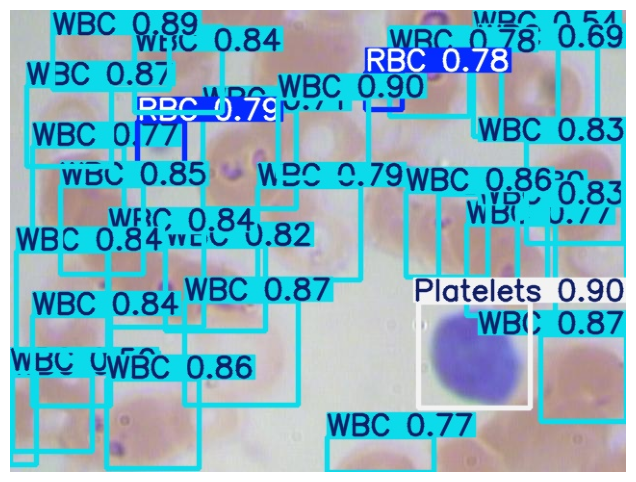

In [47]:
import cv2
import matplotlib.pyplot as plt
import os


image_filename = "BloodImage_00038_jpg.rf.63d04b5c9db95f32fa7669f72e4903ca.jpg"
image_path = os.path.join("runs/detect/exp", image_filename)


if not os.path.exists(image_path):
    print(f"Error: File '{image_path}' not found!")
else:

    image = cv2.imread(image_path)
    
    
    if image is None:
        print(f"Error: Unable to load image '{image_path}'")
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.show()


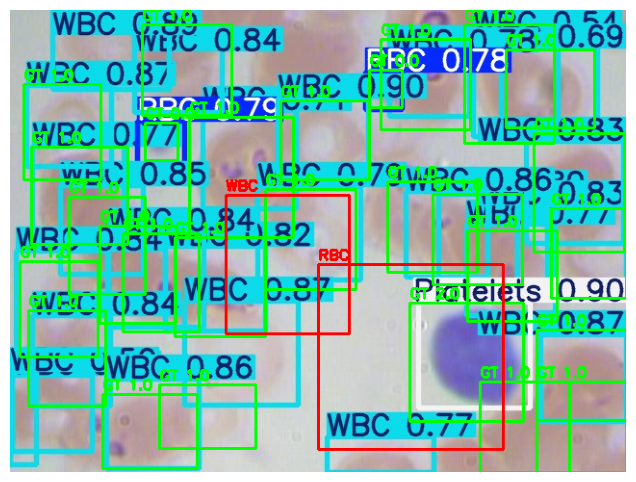

In [48]:
import cv2
import matplotlib.pyplot as plt


image_path = "runs/detect/exp/BloodImage_00038_jpg.rf.63d04b5c9db95f32fa7669f72e4903ca.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


label_path = "/kaggle/working/bccd-yolo/test/labels/BloodImage_00038_jpg.rf.63d04b5c9db95f32fa7669f72e4903ca.txt"
with open(label_path, "r") as file:
    gt_boxes = file.readlines()


predictions = [
    ("WBC", 0.45, 0.55, 0.2, 0.3),  # Example predicted box (convert from actual model output)
    ("RBC", 0.65, 0.75, 0.3, 0.4)
]


for line in gt_boxes:
    class_id, x, y, w, h = map(float, line.split())
    x1, y1 = int((x - w / 2) * image.shape[1]), int((y - h / 2) * image.shape[0])
    x2, y2 = int((x + w / 2) * image.shape[1]), int((y + h / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green = Ground Truth
    cv2.putText(image, f"GT {class_id}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
for label, x, y, w, h in predictions:
    x1, y1 = int((x - w / 2) * image.shape[1]), int((y - h / 2) * image.shape[0])
    x2, y2 = int((x + w / 2) * image.shape[1]), int((y + h / 2) * image.shape[0])
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red = Model Prediction
    cv2.putText(image, f"{label}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.show()


In [49]:
from IPython.display import FileLink

FileLink(r'/kaggle/working/best_model/best.pt')


/kaggle/working/best_model/best.pt